### ILAS: Introduction to Programming 2017/18
# Coursework Assignment: Plant-life Report

__Complete exercises A to E.__
<br>__The exercises should be completed using Python programming skills we have covered in class. The questions are focussed on an imaginary case study:__ 

>It is though that the acidification of an area of protected land is having a destructive effect on plant populations. 
<br>Experts are particularly worried about the demise of a species of shrub called *winter heath* that supports the area's insect poulations and the spread of an acid-loving poisonous weed called *darley heath* . <br>Chemical waste from local industries are thought to be reposonsible for the soil acidification.
<br>Your job is to process data collected over a number of years to present as part of a report.
<br>The report will be used as evidence to try and impose restrictions disposal of industrial waste within the area.

<img src="img/map2.png" alt="Drawing" style="width: 500px;"/>

### Input data
Data collectd by a plant survey over the past 20 years is given in the folder `environmental_survey` in the `sample_data` folder of the ILAS_python repository.

The survey was conducted at least once a year. 

The locations and characteristics of plants and trees were recorded.

Soil pH was also recorded at different locations.

### Setting up

Create a new folder in which to store your project.

Copy the `environmental_survey` folder into the project folder.

### Part A: Assembling a Data Set

__Aim: Import plant data from .csv files and manipulate data to convert units and remove unecessary values.__

__(1.) Input and Output: Data Frames 
<br>*(5 marks)*__
<br>Write a Python program that imports the data from the file `plants2017` and stores it as a __`pandas DataFrame`__. 

The data set should contain only the data for shrub plants. 
<br>Remove the rows with "tree" in the plants column to leave only information about shrubs in your data set.

(Hint: After removing data from a DataFrame use `df.reset_index(drop=True)` (where 'df' is the DataFrame name) to re-assign index numbers).  

In [3]:
import pandas as pd

df = pd.read_csv("environmental_survey/plants2017.csv")
  
# selects shrubs only
df = df[df["Plant"] == 'shrub']
# OR
df = df[df.Plant == 'shrub']
df = df.loc[df.Plant=='shrub']
df = df.loc[df["Plant"]=='shrub']

# reset index
df = df.reset_index(drop=True) 

display(df.head())

,GPS_lon,GPS_lat,Plant,height_m,leaf_length_cm,leaf_aspect_ratio,bud_length_cm
0,136.75763,35.732232,shrub,1.21,0.9,2.1,2.1
1,136.75856,35.732232,shrub,1.34,6.1,1.5,2.5
2,136.75949,35.732232,shrub,0.75,0.5,10.2,1.4
3,136.76042,35.732232,shrub,1.26,0.5,1.6,2.3
4,136.76135,35.732232,shrub,1.38,1.2,1.7,2.4


__(2.) Functions__
<br>__*(5 marks)*__
<br>The GPS location information for each plant is in units of decimal degrees. 
<br>To make them more "human readable", the values should be converted to represent each data point on a 2D grid, with units of metres (or kilometres). 

<img src="img/lat_long.png" alt="Drawing" style="width: 400px;"/>

The following equations can be used to approximate:
 - the vertical distance from the *equator* from `GPS_lat`
 - the horizontal distance from the *meridian* from `GPS_lon`
 
The latitude in m from the equator:

$lat = \frac{40,008,000 \times GPS_{lat}}{360} $


The longitude in m from the meridian:

$lon = \frac{40,075,160 \times GPS_{lon}}{360} \times \cos(GPS_{lat})$

<img src="img/ParametricCircle.png" alt="Drawing" style="width: 200px;"/>

Write code to convert GPS_lat and GPS_lon in decimal degrees to units of m or km, using the equation above. 
<br>__*Hint: `GPS_lat` and `GPS_lat` are given in degrees, `numpy.cos` automatically applies to angles given in radians.*__

Encapsulate your code in a function so that it can be applied to any data frame.
(Hint: your function should take the columns of data frame to be converted as its arguments).

Show your function works by applying it to your data frame.

(You can also want to *rename* your column heading as they are no longer GPS coordinates.)

In [4]:
import numpy as np

def DD_to_m(gpslat, gpslon):
    "Converts latitude and longitude in GPS decimal dgerees to metres from equator and meridian respectively"
    
    lat = (40_008_000 * gpslat) / 360
    
    lon = (40_075_160  * gpslon * np.cos(np.radians(gpslat)))  / 360 
    
    return lat, lon   


df["GPS_lat"], df["GPS_lon"] = DD_to_m(df["GPS_lat"], df["GPS_lon"])

df.rename(columns={'GPS_lat': 'lat_m', 'GPS_lon': 'lon_m'}, inplace=True)

display(df.head())

,lon_m,lat_m,Plant,height_m,leaf_length_cm,leaf_aspect_ratio,bud_length_cm
0,1.235803e+07,3.971042e+06,shrub,1.21,0.9,2.1,2.1
1,1.235812e+07,3.971042e+06,shrub,1.34,6.1,1.5,2.5
2,1.235820e+07,3.971042e+06,shrub,0.75,0.5,10.2,1.4
3,1.235829e+07,3.971042e+06,shrub,1.26,0.5,1.6,2.3
4,1.235837e+07,3.971042e+06,shrub,1.38,1.2,1.7,2.4


__(3.) Functions and Data Structures: Boolean Indexing__ 
<br>__*(5 marks)*__
<br>When fully grown, the four main shrubs that grow in the area can be identified by distinct features.

To include *only fully grown* plants in your data set:
- Write a function that selects only plants above a height of 50cm.
- Apply the function to your data set.
- Edit your function so that the same function may be used to:
  - remove plants below 50cm by default
  - remove plants below a height set by the user
  


In [5]:
def fully_grown(data, max_h=0.5):    
    return data[data["height_m"] > max_h]
    # OR
    return data[data.height_m > max_h]
    return data.loc[data.height_m > max_h]
    return data.loc[data["height_m"] > max_h]


# call function
df = fully_grown(df)

# reset index
df = df.reset_index(drop=True) 

display(df.head())    

print(min(df.lat_m))
print(max(df.lat_m))
print(min(df.lon_m))
print(max(df.lon_m))




,lon_m,lat_m,Plant,height_m,leaf_length_cm,leaf_aspect_ratio,bud_length_cm
0,1.235803e+07,3.971042e+06,shrub,1.21,0.9,2.1,2.1
1,1.235812e+07,3.971042e+06,shrub,1.34,6.1,1.5,2.5
2,1.235820e+07,3.971042e+06,shrub,0.75,0.5,10.2,1.4
3,1.235829e+07,3.971042e+06,shrub,1.26,0.5,1.6,2.3
4,1.235837e+07,3.971042e+06,shrub,1.38,1.2,1.7,2.4


3971042.01319
3974991.60007
12358033.6116
12361478.9934


### Part B: Refining the Data Set and Mapping pH

__Aim: Split the area over which the survey was taken into a grid of equally sized cells. Sort the pH samples by grid cell to show how pH varies across the area.__

__(1.) Input and Output__ 
<br>__*(2 marks)*__
<br>In the same Python file you wrote in __Part A__, import the data from the file `pH_2017` and store it as a new __`pandas DataFrame`__ called `pH`.
<br>

__(2.) Functions__
<br>__*(2 marks)*__
<br>Use the function that you wrote in __Part A (2.)__ to convert the the columns GPS_lat and GPS_lon in `pH` to units of m or km. 

In [6]:
import pandas as pd

dfph = pd.read_csv("environmental_survey/pH2017.csv")

# TODO: remove
# dfph.rename(columns={'GPSx': 'GPS_lat', 'GPSy': 'GPS_lon', }, inplace=True) 

dfph["GPS_lat"], dfph["GPS_lon"] = DD_to_m(dfph["GPS_lat"], dfph["GPS_lon"])

dfph.rename(columns={'GPS_lat': 'lat_m', 'GPS_lon': 'lon_m'}, inplace=True)

display(dfph.head())

# import matplotlib.pyplot as plt
# %matplotlib inline

# plt.plot(dfph.lon_m, dfph.lat_m, 'ro')

,lon_m,lat_m,pH
0,1.235803e+07,3.971042e+06,3.44548
1,1.235812e+07,3.971042e+06,3.60168
2,1.235820e+07,3.971042e+06,1.67105
3,1.235829e+07,3.971042e+06,3.29233
4,1.235837e+07,3.971042e+06,1.89779


The sampled area measures approximately 3445m x 3950m.
<br>An orthoganol grid of 15 x 15 cells (3000m x 3000m) can be used to represent the sampled area:
 - the grid is chosen to be slightly smaller than the sampled area so that no unsampled regions are included.
 - the origin is chosen to be at 
  - $x = x_{min} + \frac{3445-3000}{2}$
  - $y =  y_{min} + \frac{3950-3000}{2}$
  
<img src="img/map.png" alt="Drawing" style="width: 500px;"/>

The following equation can be used to map a point, $P$, in range A to range B.

$P_B=\frac{P_A-A_{min}}{A_{max}-A_{min}} \times (B_{max}-B_{min}) + B_{min}$

__(3.) Functions and mathematical operators.__ 
<br>__*(5 marks)*__

Write a function called `scale` to map points in the range (origin, origin+3000) to the range (0, 3000).

By floor dividing (seminar 2) points in the range 0 to 3000 by 200, each point can be assigned an integer value in the range 0 to 14.  

Adapt the function `scale` to give return arguments that 4.  




Add two new columns to your DataFrame to store the x and y grid reference for each data point by using floor division to divide value by 200. Include floor division by 200 in your function so that it takes the location of each point and returns a grid index. (Note some bin values will be outside of the range 0 to 14).

Store your function that assigns a grid index as function so that it can be applied to any data set collected in the same area.

In [7]:
lon_min = min(dfph.lon_m)
lat_min = min(dfph.lat_m)

grid_length = 3000

origin_x = lon_min + ((3445 - grid_length) / 2)
origin_y = lat_min + ((3950 - grid_length) / 2)


def scale(val, old_min, old_max, new_min, new_max):
    return ((val - old_min)/(old_max - old_min)) * (new_max - new_min) + new_min


def grid_ref(val, old_min, old_max, new_min, new_max):
    
    new_val = ((val - old_min)/(old_max - old_min)) * (new_max - new_min) + new_min
    
    grid_ref = new_val // 200
    
    return grid_ref


idx_x = grid_ref(dfph.lon_m, origin_x, origin_x + grid_length, 0, grid_length)
idx_y = grid_ref(dfph.lat_m, origin_y, origin_y + grid_length, 0, grid_length)

dfph.insert(loc=0, column='idx_y', value=idx_y)
dfph.insert(loc=0, column='idx_x', value=idx_x)


display(dfph.head())

,idx_x,idx_y,lon_m,lat_m,pH
0,-2.0,-3.0,1.235803e+07,3.971042e+06,3.44548
1,-1.0,-3.0,1.235812e+07,3.971042e+06,3.60168
2,-1.0,-3.0,1.235820e+07,3.971042e+06,1.67105
3,0.0,-3.0,1.235829e+07,3.971042e+06,3.29233
4,0.0,-3.0,1.235837e+07,3.971042e+06,1.89779


__(3.) `numpy` multi-dimensional arrays.__ 
<br>__*(2 marks)*__
<br>_Find the mean of the pH readings taken in each grid cell.
<br>Use a 2D numpy array to store each mean reading at each 2D grid location.
<br>Plot the mean pH for each grid cell as a colour map of the area. 



In [8]:
n_cells_x = int(3000 / 200)
n_cells_y = int(3000 / 200)

X = np.arange(n_cells_x)
Y = np.arange(n_cells_y)
pH = np.empty((n_cells_x, n_cells_y))


for x in range(n_cells_x):
    for y in range(n_cells_y-1, -1, -1):        

        ph = dfph[(dfph.idx_x == x) & (dfph.idx_y == y)].pH
        # OR        
        # ph = dfph[(dfph.idx_x == x) & (dfph.idx_y == y)]["pH"]
        
        # ph = dfph.loc[(dfph.idx_x == x) & 
        #               (dfph.idx_y == y) , "pH"]

        
        ph_ave = np.mean(ph)
        
        pH[y, x] = ph_ave 



__(4.) Plotting__
<br>__*(3 marks)*__
<br>Represent you data as a map of pH across the gridded area.
<br>You may use a *colour map* or a *3D plot*. 
<br>Save your figure as a .png file in your project folder.


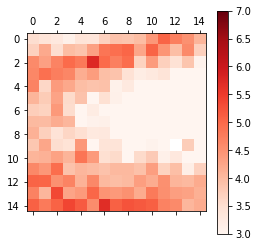

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.cm as cm

plt.matshow(pH, cmap=cm.Reds, vmin=3, vmax=7)
plt.colorbar();


# with axis labels

x_axis = scale(X, 0, n_cells_x, origin_x, origin_x + grid_length)
y_axis = scale(Y, 0, n_cells_y, origin_y, origin_y + grid_length)

# plt.pcolor(x_axis,y_axis,pH, cmap=cm.Reds, vmin=3, vmax=7)
# plt.colorbar();

# plt.contourf(x_axis, y_axis, pH, cmap=cm.Reds)
# plt.colorbar();




/home/hemma/anaconda3/lib/python3.6/site-packages/matplotlib/colors.py:496: RuntimeWarning: invalid value encountered in less
  cbook._putmask(xa, xa < 0.0, -1)


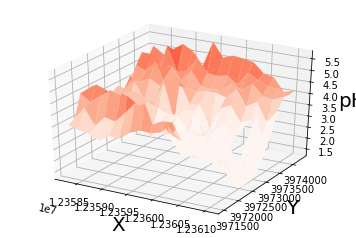

In [10]:
from mpl_toolkits.mplot3d import axes3d

x, y = np.meshgrid(x_axis, y_axis)

# Create a figure
fig = plt.figure()

# Specify 3D axes
ax = plt.axes(projection='3d')

# Plot the function as a surface
surf = ax.plot_surface(x, y, pH, cmap=cm.Reds, vmin=3, vmax=7)

# Label the axes
ax.set_xlabel('X', fontsize=20)
ax.set_ylabel('Y', fontsize=20)
ax.set_zlabel('pH', fontsize=20)


### Part C: Classifying Plants Using Simple Mathematical Operations

__Aim: Sort the plant samples species. Produce a total count of each species in each grid cell.__

<br>The shrub plants in your DataFrame from __Part A__ can be catagorsied as one of four species.

The *average* physical characteristics of each *plant species* are shown in the table below:

|Shrub       |Height (m)|Leaf length (cm)|Leaf aspect ratio|Bud length (cm)|
|------------|----------|----------------|-----------------|---------------|
|Winter heath|       1.2|             3.5|              2.0|            2.3|              
|Bell heather|       1.8|             1.5|              1.2|            2.3|
|Brush bush  |       0.7|             2.1|             10.2|            1.5|
|Darley heath|       0.7|             2.2|              3.1|            1.7|

<br>The *vector quantisation algorithm* is a simple algorithm used for catagorisation.

It determines which catagory a data point should belong to from its closest proximity to a set of values representing possible catagories.
<br>Each value represents the *average* of the corresponding catagory.

The *closeness* of the characteristics of a point $(c_1, c_2, c_3, ... c_n)$ to the average value of a catagory $(ca_1, ca_2, ca_3, ... ca_n)$ can be determined by the magnitude:

<br>$d = \sqrt{(ca_1-c_1)^2 + (ca_2-c_2)^2 + (ca_3-c_3)^2 + ... + (ca_n-c_n)^2}$ <br>

If $d$ is evaluated for each catagory, the catagory with the *minimium* value of $d$ represents the closest fit.

The vector quantisation algorithm can be applied to each data point using a for loop or numpy broadcasting.



__(1.) Mathematical compuation with Numpy__ 
<br>__*(5 marks)*__
<br>Use the vector quantisation algorithm to determine the species of each plant.
<br>Hint: Use a for loop or use broadcasting. 
<br>Add a column to your DataFrame called "species" with the species of each plant that most closely fits the plant characteristics. 

In [11]:
display(df.head())

species = []

for index, row in df.iterrows():

    d1 = np.linalg.norm([(row['height_m'] - 1.2),
                         (row['leaf_length_cm'] - 3.5),
                         (row['leaf_aspect_ratio'] - 2.0),
                         (row['bud_length_cm'] - 2.3)])
    
    d2 = np.linalg.norm([(row['height_m'] - 1.8),
                         (row['leaf_length_cm'] - 1.5),
                         (row['leaf_aspect_ratio'] - 1.2),
                         (row['bud_length_cm'] - 2.3)])
    
    d3 = np.linalg.norm([(row['height_m'] - 0.7),
                         (row['leaf_length_cm'] - 2.1),
                         (row['leaf_aspect_ratio'] - 10.2),
                         (row['bud_length_cm'] - 1.5)])
    
    d4 = np.linalg.norm([(row['height_m'] - 0.7),
                         (row['leaf_length_cm'] - 2.2),
                         (row['leaf_aspect_ratio'] - 3.1),
                         (row['bud_length_cm'] - 1.7)])

    fit = np.min([d1, d2, d3, d4])
    
    if fit == d1:
        species.append("winter heath")
    elif fit == d2:
        species.append("bell heather")
    elif fit == d3:
        species.append("bush brush")
    else:
        species.append("darley heath")
    
    # OR     
    types = ["winter heath", "bell heather", "bush brush", "darley heath"]    
    # fit = np.argmin([d1, d2, d3, d4])
    # species.append(types[fit])

print(len(df.Plant))
print(len(species))
        
df.insert(loc=4, column='species', value=species)


display(df.head())



,lon_m,lat_m,Plant,height_m,leaf_length_cm,leaf_aspect_ratio,bud_length_cm
0,1.235803e+07,3.971042e+06,shrub,1.21,0.9,2.1,2.1
1,1.235812e+07,3.971042e+06,shrub,1.34,6.1,1.5,2.5
2,1.235820e+07,3.971042e+06,shrub,0.75,0.5,10.2,1.4
3,1.235829e+07,3.971042e+06,shrub,1.26,0.5,1.6,2.3
4,1.235837e+07,3.971042e+06,shrub,1.38,1.2,1.7,2.4


1455
1455


,lon_m,lat_m,Plant,height_m,species,leaf_length_cm,leaf_aspect_ratio,bud_length_cm
0,1.235803e+07,3.971042e+06,shrub,1.21,bell heather,0.9,2.1,2.1
1,1.235812e+07,3.971042e+06,shrub,1.34,winter heath,6.1,1.5,2.5
2,1.235820e+07,3.971042e+06,shrub,0.75,bush brush,0.5,10.2,1.4
3,1.235829e+07,3.971042e+06,shrub,1.26,bell heather,0.5,1.6,2.3
4,1.235837e+07,3.971042e+06,shrub,1.38,bell heather,1.2,1.7,2.4


In [12]:
# or use broadcasting

# species = []

# for index, row in df.iterrows():

#     plant = np.array([row['height_m'], 
#                       row['leaf_length_cm'], 
#                       row['leaf_aspect_ratio'], 
#                       row['bud_length_cm']])
    
#     categories = np.array([[1.2, 3.5, 2.0, 2.3],
#                            [1.8, 1.5, 1.2, 2.3],
#                            [0.7, 2.1, 10.2, 1.5],
#                            [0.7, 2.2, 3.1, 1.7]])
    
#     types = ["winter heath", "bell heather", "bush brush", "darley heath"]    
    
#     d = (plant - categories)
#     d = np.linalg.norm(d, axis=1)
#     fit = np.argmin(d)
#     species.append(types[fit])
    
# df.insert(loc=4, column='species', value=species)

# display(df.head())

__(2.) Functions__ 
<br>__*(1 mark)*__
<br>Use the function that you wrote for __Part B: (2.)__ to assign a grid reference to each data point.  <br>Save the grid refernce x and y value as two columns in your Data Frame.


In [13]:
idx_x = grid_ref(df.lon_m, origin_x, origin_x + grid_length, 0, grid_length)
idx_y = grid_ref(df.lat_m, origin_y, origin_y + grid_length, 0, grid_length)

df.insert(loc=0, column='idx_y', value=idx_y)
df.insert(loc=0, column='idx_x', value=idx_x)

In [14]:
display(df.head())

,idx_x,idx_y,lon_m,lat_m,Plant,height_m,species,leaf_length_cm,leaf_aspect_ratio,bud_length_cm
0,-2.0,-3.0,1.235803e+07,3.971042e+06,shrub,1.21,bell heather,0.9,2.1,2.1
1,-1.0,-3.0,1.235812e+07,3.971042e+06,shrub,1.34,winter heath,6.1,1.5,2.5
2,-1.0,-3.0,1.235820e+07,3.971042e+06,shrub,0.75,bush brush,0.5,10.2,1.4
3,0.0,-3.0,1.235829e+07,3.971042e+06,shrub,1.26,bell heather,0.5,1.6,2.3
4,0.0,-3.0,1.235837e+07,3.971042e+06,shrub,1.38,bell heather,1.2,1.7,2.4


__(3.) Data Structures: Lists__ 
<br>__*(5 marks)*__

Create a list for each of the following fields.
1. x grid index 
1. y grid index 
1. average pH reading
1. total count of *Winter heath* plant
1. total count of *Bell heather* plant
1. total count of *Brush bush* plant
1. total count of *Darley heath* plant

Loop through each grid cell and store a computed value for each field. 

Store the lists as a list of lists (nested lists).




In [15]:
x_idx = []
y_idx = []
pH = []
winter_heath = []
bell_heather = []
brush_bush = []
darley_heath = []

for x in range(n_cells_x):
    for y in range(n_cells_y):        

        ph = dfph[(dfph.idx_x == x) & (dfph.idx_y == y)].pH

        ph_ave = np.mean(ph)
        
        x_idx.append(x)
        y_idx.append(y)
        pH.append(ph_ave )       
        winter_heath.append( len(df[(df.idx_y == y) & 
                               (df.idx_x == x) & 
                               (df.species == "winter heath")]))
        
        bell_heather.append( len(df[(df.idx_y == y) & 
                               (df.idx_x == x) & 
                               (df.species == "bell_heather")]))
        
        brush_bush.append( len(df[(df.idx_y == y) & 
                               (df.idx_x == x) & 
                               (df.species == "brush_bush")]))
        
        darley_heath.append(len(df[(df.idx_y == y) & 
                               (df.idx_x == x) & 
                               (df.species == "darley_heath")]))

fields = [x_idx, y_idx, pH, winter_heath, bell_heather, brush_bush, darley_heath]

### Part D: Using Multiple Files to Produce Time-Series Data

__Aim: Run all the steps that you coded in Part A-C for every envioronmental survey collected between the years 1997-2017 to produce time series data of the plant count and average pH.__

__(1.) Control Flow__ 
<br>__*(5 marks)*__
<br>Use a for loop to store a list of lists like you created in __Part C: (3.)__ for each year of the environmental survey (1997-2017)

Hint: You can loop through each plant survey using:
>```Python 
annual_data=[]
for year in range(1997, 2018):
    df = pd.read_csv("environmental_survey/plants" + str(year) + ".csv") 
```

Hint: Append the list of lists created in __Part C: (3.)__ to the list `annual_data` each time the code loops.


>```Python 
annual_data=[]
for year in range(1997, 2018):
    df = pd.read_csv("environmental_survey/plants" + str(year) + ".csv") 
```

__(2.) Plotting and Curve Fitting__
<br>__*(5 marks)*__

<br>The two closest industrial sites to the area of land are:
<br>__Sketchy inc.__ , established 1995, GPS coordinates lon = 136.7647, lat = 35.7336
<br>__Philamore co.__ , established 1990, GPS coordinates lon = 136.8262, lat = 35.7498

<br>Choose one grid cell that is close to an industrial site and one grid cell that is far from the industrial sites.
<br>Plot a scatter graph of the average pH and plant count for each species (y axis) against time (x axis).
<br>Fit a trendline to each data series
<br>Show the equation of the trendline and the proximity to an industrial site as labels. 

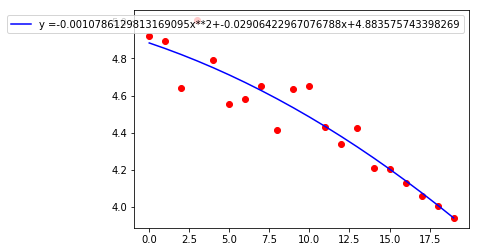

In [16]:
import pandas as pd

arrays  = []

for year in range(1997, 2017):
    
    df = pd.read_csv("environmental_survey/plants" + str(year) + ".csv")
    
    # selects shrubs only
    df = df[df["Plant"] == 'shrub']
    # OR
    df = df[df.Plant == 'shrub']
    df = df.loc[df.Plant=='shrub']
    df = df.loc[df["Plant"]=='shrub']

    # reset index
    df = df.reset_index(drop=True) 
    
    df["GPS_lat"], df["GPS_lon"] = DD_to_m(df["GPS_lat"], df["GPS_lon"])

    df.rename(columns={'GPS_lat': 'lat_m', 'GPS_lon': 'lon_m'}, inplace=True)

    # call function
    df = fully_grown(df)

    # reset index
    df = df.reset_index(drop=True) 
    
    dfph = pd.read_csv("environmental_survey/pH" + str(year) + ".csv")

    dfph["GPS_lat"], dfph["GPS_lon"] = DD_to_m(dfph["GPS_lat"], dfph["GPS_lon"])

    dfph.rename(columns={'GPS_lat': 'lat_m', 'GPS_lon': 'lon_m'}, inplace=True)
    
    lon_min = min(dfph.lon_m)
    lat_min = min(dfph.lat_m)

    grid_length = 3000

    origin_x = lon_min + ((3445 - grid_length) / 2)
    origin_y = lat_min + ((3950 - grid_length) / 2)


    idx_x = grid_ref(dfph.lon_m, origin_x, origin_x + grid_length, 0, grid_length)
    idx_y = grid_ref(dfph.lat_m, origin_y, origin_y + grid_length, 0, grid_length)

    dfph.insert(loc=0, column='idx_y', value=idx_y)
    dfph.insert(loc=0, column='idx_x', value=idx_x)
    
    species = []

    for index, row in df.iterrows():

        plant = np.array([row['height_m'], 
                          row['leaf_length_cm'], 
                          row['leaf_aspect_ratio'], 
                          row['bud_length_cm']])

        categories = np.array([[1.2, 3.5, 2.0, 2.3],
                               [1.8, 1.5, 1.2, 2.3],
                               [0.7, 2.1, 10.2, 1.5],
                               [0.7, 2.2, 3.1, 1.7]])
        
        types = ["winter heath", "bell heather", "bush brush", "darley heath"]    

        d = (plant - categories)
        d = np.linalg.norm(d, axis=1)
        fit = np.argmin(d)
        species.append(types[fit])
    
    df.insert(loc=4, column='species', value=species)
    
    idx_x = grid_ref(df.lon_m, origin_x, origin_x + grid_length, 0, grid_length)
    idx_y = grid_ref(df.lat_m, origin_y, origin_y + grid_length, 0, grid_length)

    df.insert(loc=0, column='idx_y', value=idx_y)
    df.insert(loc=0, column='idx_x', value=idx_x)    
    
    x_idx = []
    y_idx = []
    pH = []
    winter_heath = []
    bell_heather = []
    brush_bush = []
    darley_heath = []

    for x in range(n_cells_x):
        for y in range(n_cells_y):        

            ph = dfph[(dfph.idx_x == x) & (dfph.idx_y == y)].pH

            ph_ave = np.mean(ph)

            x_idx.append(x)
            y_idx.append(y)
            pH.append(ph_ave )       
            winter_heath.append( len(df[(df.idx_y == y) & 
                                   (df.idx_x == x) & 
                                   (df.species == "winter heath")]))

            bell_heather.append( len(df[(df.idx_y == y) & 
                                   (df.idx_x == x) & 
                                   (df.species == "bell_heather")]))

            brush_bush.append( len(df[(df.idx_y == y) & 
                                   (df.idx_x == x) & 
                                   (df.species == "brush_bush")]))

            darley_heath.append(len(df[(df.idx_y == y) & 
                                   (df.idx_x == x) & 
                                   (df.species == "darley_heath")]))

    fields = [x_idx, y_idx, pH, winter_heath, bell_heather, brush_bush, darley_heath]
    
    arrays.append(fields)



ph105 = [a[2][105] for a in arrays]

t = range(len(ph105))
y = ph105

c, d, e = np.polyfit(t, y, 2)

yfit2 = np.poly1d([c, d, e])(t)

plt.plot(t, y, 'ro')
plt.plot(t, yfit2, 'b', label= f'y ={c}x**2+{d}x+{e}')

# add a legend
plt.legend(loc='best')